Formal Definition of Simplicial Complex:

A tuple $(V, S)$ where $V$ is a finite set of vertices and $S$ is a set of non-empty subsets of $V$ where

\begin{align}
p \in V &\implies \{ p \} \in S \\
\sigma \in S, \tau \subseteq \sigma &\implies \tau \in S
\end{align}

So, let's look at the below simplicial complex:

![simplicial complex](simplicial_complex.jpg)
https://commons.wikimedia.org/wiki/File:Tetrahedron.jpg

We can see that the tetrahedron can be represented as

$V = \{0,1,2,3\}$ and
$S = \{ \{ 0 \}, \{1 \}, \{2 \}, \{3\}, \{0, 1\}, \{0, 2\}, \{0, 3\}, \{1, 2 \}, \{1, 3 \}, \{2, 3 \}, \{0, 1, 2 \}, \{0, 1, 3\}, \{0, 2, 3\}, \{1, 2, 3\}, \{0, 1, 2, 3 \} \}$.

Each element $\sigma \in S$ is called a *simplex* or *face* of a simplicial complex. Therefore, the simplex above can be considered a 3-simplex. 

We can look at a face of a simplex $\sigma$ as a subset of the vertices of $\sigma$. A *facet* is a face of maximal dimension and if $\sigma$ is a face of $\tau$, $\tau$ is a coface of $\sigma$. Lastly, the subset of simples of all the cofaces of $\sigma$ is the start of $\sigma$. We need to also look at $Lk(\sigma)$, which is the set of faces that do not share a vertex with $\sigma$ essentially.

However, representing these simplicial complexes as sets of sets leads to very inefficient manipulations. 

So, instead we use a simplex tree. This is a **trie**, which represents all of the simplices as strings in the trie.

Each simplex of the simplicial complex *K* is a word on the alphabet. The *j*-simplex is represented with length *j + 1*. The last label of the word representation of a simplex $\sigma$ is called *last($\sigma$)*. 

The simplex tree satisfies 3 properties:

1. The nodes of the simplex tree are in bijection with the simplices of the complex.
2. Each node of the tree stores the label of the vertex.
3. The vertex whose labels are encountered from the root to a node are associated with a simplex $\sigma$ are the vertices of $\sigma$. Labels are sorted in increasing order and each label appears no more than once.

The children of the root are the *top nodes*. Nodes with the same parent are sibling nodes. 

$D_m$ is the maximal number of operations needed to perform a search, an insertion or a removal in a dictionary of maximal size $\deg(T)$.

In [2]:
%matplotlib inline
from SimplexTree import MeshSimplexTree
import numpy as np

<IPython.core.display.Javascript object>


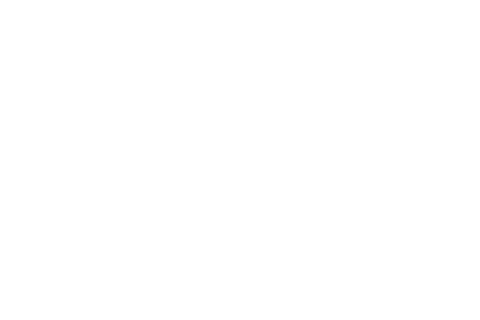

<IPython.core.display.Javascript object>


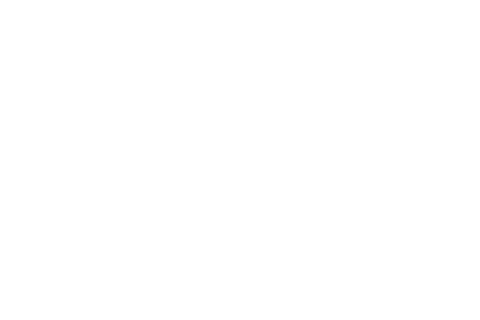

In [17]:
t = MeshSimplexTree()
t.add_simplex((0, 1, 2, 3),((1, 0, 0), (0, 1, 0), (0, 0, 1), (0, 0, 0)))
t.add_simplex((2, 3, 4), (0, 0, (-1, 0, 0)))
t.add_simplex((2, 3, 5), (0, 0, (0, -1, 0)))
fig, ax = t.plot()

## Mesh Simplification with Homotopy Type Preservation

Extremely slow!

In [4]:
%matplotlib notebook
from SimplexTree import MeshSimplexTree
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from stl.mesh import Mesh

In [2]:
# Drawing Utilities

def get_num_vertices(simplicial_complex):
    return len([0 for s in simplicial_complex if len(s) == 1])

def plot_complex(simplicial_complex):
    ax, fig = simplicial_complex.plot(.6)
#    fig.set_size_inches(18.5, 10.5)
    return ax, fig

In [8]:
get_num_vertices(t)

3313

In [5]:
mesh = Mesh.from_file("/home/ryan/Thesis/models/Dalek.stl")
t = MeshSimplexTree.from_mesh(mesh)
get_num_vertices(t)

3313

In [5]:
tcopy = t.copy()

<IPython.core.display.Javascript object>


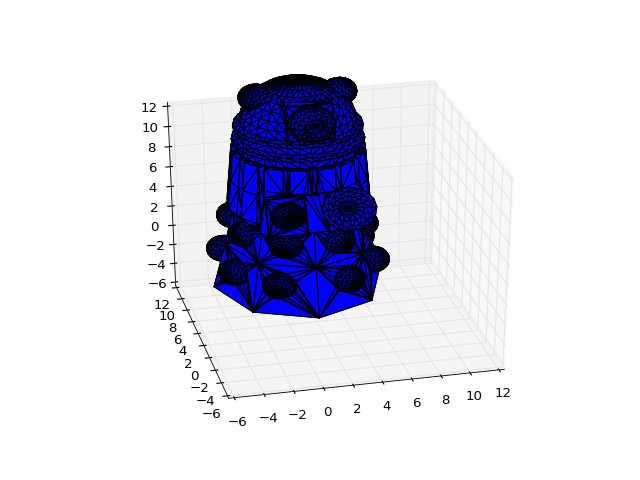

In [6]:
%matplotlib notebook
plot_complex(t)
plt.show()

In [7]:
tcopy.mesh_simplify(500)

main for loop:  0 6622
main for loop:  10 6476
main for loop:  20 6276
main for loop:  30 6123
main for loop:  40 5924
main for loop:  50 5799
main for loop:  60 5551
main for loop:  70 5434
main for loop:  80 5298
main for loop:  90 5087
main for loop:  100 4901
main for loop:  110 4797
main for loop:  120 4591
main for loop:  130 4311
main for loop:  140 4076
main for loop:  150 3808
main for loop:  160 3637
main for loop:  170 3518
main for loop:  180 3295
main for loop:  190 3018
main for loop:  200 2880
main for loop:  210 2730
main for loop:  220 2617
main for loop:  230 2435
main for loop:  240 2332
main for loop:  250 2125
main for loop:  260 1999
main for loop:  270 1827
main for loop:  280 1530
main for loop:  290 1400
main for loop:  300 1157
main for loop:  310 889
main for loop:  320 454
main for loop:  330 6293
main for loop:  340 5964
main for loop:  350 5533
main for loop:  360 5101
main for loop:  370 4714
main for loop:  380 4175
main for loop:  390 3728
main for loop

In [59]:
get_num_vertices(tcopy)

2814

<IPython.core.display.Javascript object>


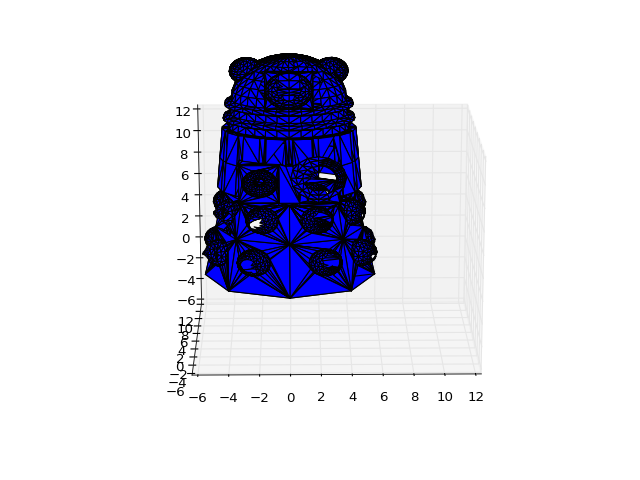

In [11]:
plot_complex(tcopy)
plt.show()

In [12]:
tcopy2 = tcopy.copy()

In [13]:
tcopy2.mesh_simplify(500)
get_num_vertices(tcopy2)

main for loop:  0 6124
main for loop:  10 5001
main for loop:  20 3593
main for loop:  30 1917
main for loop:  40 6085
main for loop:  50 2245
main for loop:  60 3855
main for loop:  70 4611


KeyboardInterrupt: 

<IPython.core.display.Javascript object>


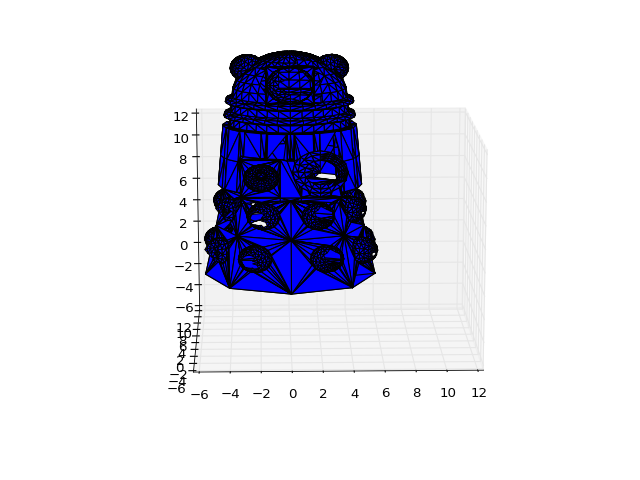

In [14]:
plot_complex(tcopy2)
plt.show()

## Mesh Simplification without Homotopy Type Preservation

In [1]:
%matplotlib inline
from SimplexTree import MeshSimplexTree
import matplotlkib.pyplot as plt
import numpy as np
from stl.mesh import Mesh
mesh = Mesh.from_file('/home/ryan/Thesis/models/Dalek.stl')
t = MeshSimplexTree.from_mesh(mesh)

In [2]:
t.mesh_simplify(500)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490


(-5.0, 15.0, -5.0, 15.0)

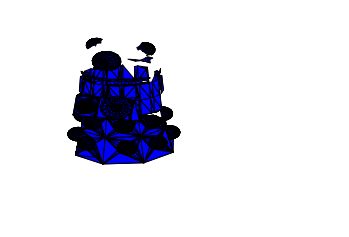

In [4]:
fig, ax = t.plot(.7)
ax.view_init(25, -70)
plt.axis("off")

In [5]:
t.mesh_simplify(500)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490


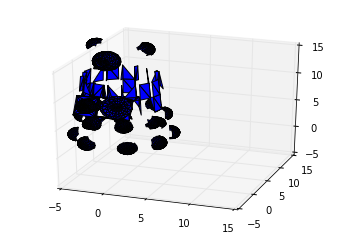

In [7]:
fig, ax = t.plot(.7)
ax.view_init(25, -70)

/home/ryan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead


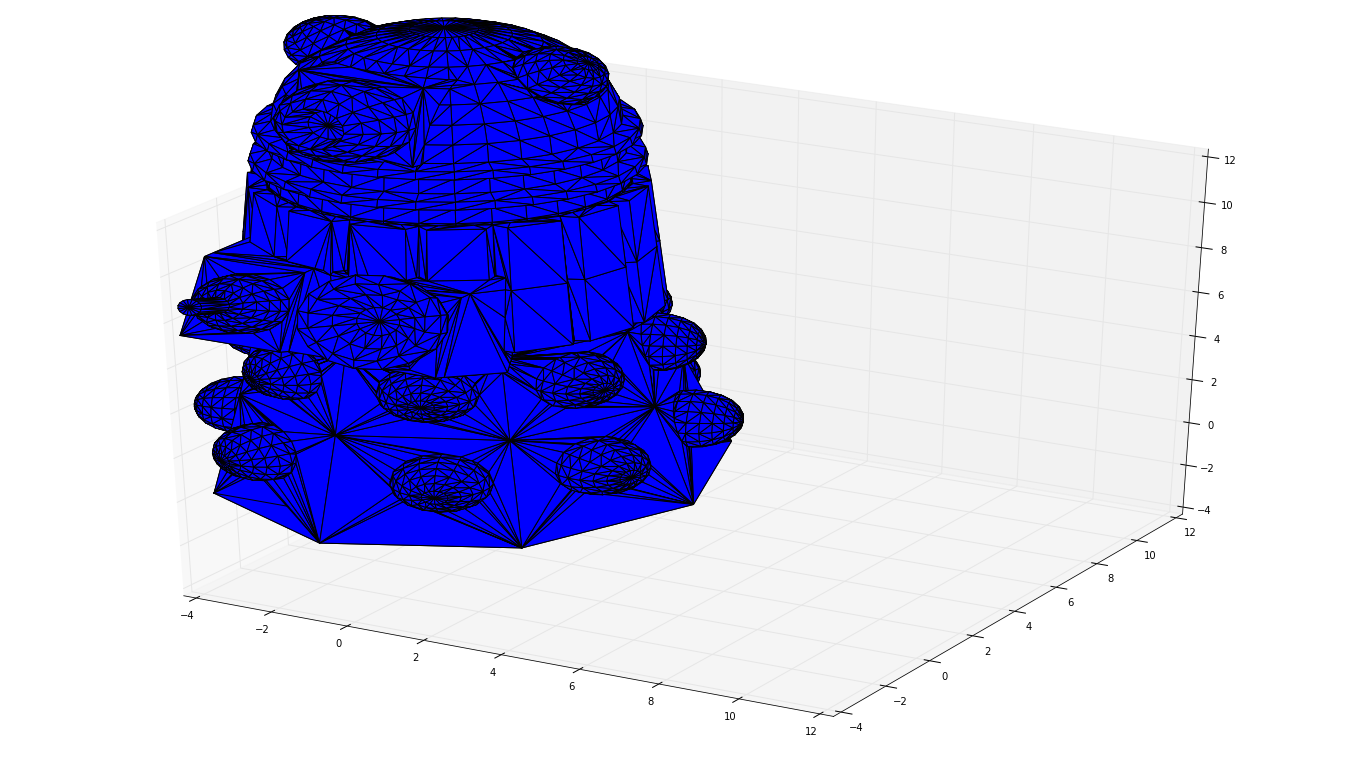

In [45]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

figure = plt.figure()
axes = Axes3D(figure)

# Load the STL files and add the vectors to the plot
your_mesh = Mesh.from_file('/home/ryan/Thesis/models/Dalek.stl')
axes.add_collection3d(Poly3DCollection(your_mesh.vectors))
scale = your_mesh.points.flatten(-1) / 1.8
axes.auto_scale_xyz(scale, scale, scale)
figure.set_size_inches(18.5, 10.5)

In [ ]:
x